# **<font color=#FF3399> Challenge : Correlação e Regressão </font>**

Bootcamp Data Analytics & Tech Minas 2023 

WoMakersCode


Suponha que você trabalha em uma empresa do setor imobiliário. Para essa empresa é muito importante precificar corretamente o imóvel, caso contrário, os corretores
podem perder a venda. Como parte do time de dados, você é responsável por analisar os principais fatores que podem afetar o preço dos imóveis. Para isso, eles te enviaram a base de dados (desafio_01_preco_imoveis.csv). Como você poderia ajudá-los?

A base de dados contém as seguintes informações:

- id : código identificador do imóvel
- date: data em que o imóvel foi cadastrado
- price: preço do imóvel
- bedrooms: número de quartos
- bathrooms: número de banheiros
- sqft_living: tamanho do imóvel (dentro da casa)
- sqft_lot: tamanho do lote / terreno
- floors: andares
- waterfront: flag se o imóvel tem vista para o mar. 1 caso positivo, 0 caso contrário.
- view: indica o número de quartos com vista.
- condition: condição do imóvel, escala de 1 a 5
- grade: nota do imóvel
- sqft_above: tamanho da casa acima do solo (excluindo porão)
- sqft_basement: tamanho do porão
- yr_built: ano em que a casa foi construída
- yr_renovated: ano em que a casa foi renovada
- zipcode: "CEP" do imóvel
- lat: latitude do imóvel
- long: longitude do imóvel

## 1 - Analise a correlação de todas as variáveis com o preço do imóvel. Quais variáveis são mais correlacionadas? Quais são menos correlacionadas?

In [812]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [813]:
df = pd.read_csv('desafio_01_preco_imoveis.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### Traduzindo as colunas

In [814]:
renomear = {
    'date' : 'data',
    'price' : 'preco',
    'bedrooms' : 'quartos',
    'bathrooms' : 'banheiros',
    'sqft_living' : 'tamanho_do_imovel',
    'sqft_lot' : 'tamanho_do_terreno',
    'floors' : 'andares',
    'waterfront' : 'vista_pro_mar',
    'view' : 'quartos_com_vista',
    'condition' : 'condicao_do_imovel',
    'grade' : 'nota_do_imovel',
    'sqft_above' : 'tamanho_da_casa',
    'sqft_basement' : 'tamanho_do_porao',
    'yr_built' : 'ano_da_construcao',
    'yr_renovated' : 'ano_da_reforma',
    'zipcode' : 'CEP',
    'lat' : 'latitude',
    'long' : 'longitude'
    }

In [815]:
df = df.rename(columns = renomear)
df.head()


,id,data,preco,quartos,banheiros,tamanho_do_imovel,tamanho_do_terreno,andares,vista_pro_mar,quartos_com_vista,condicao_do_imovel,nota_do_imovel,tamanho_da_casa,tamanho_do_porao,ano_da_construcao,ano_da_reforma,CEP,latitude,longitude
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


#### Correlação entre as variáveis

In [816]:
### Plot correlations plot
df = df.drop('data', axis=1)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,preco,quartos,banheiros,tamanho_do_imovel,tamanho_do_terreno,andares,vista_pro_mar,quartos_com_vista,condicao_do_imovel,nota_do_imovel,tamanho_da_casa,tamanho_do_porao,ano_da_construcao,ano_da_reforma,CEP,latitude,longitude
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799
preco,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626
quartos,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473
banheiros,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042
tamanho_do_imovel,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223
tamanho_do_terreno,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521
andares,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419
vista_pro_mar,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910
quartos_com_vista,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400
condicao_do_imovel,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500


In [817]:
correlacao = df[['preco', 'quartos', 'banheiros', 'tamanho_do_imovel', 'tamanho_do_terreno', 'andares', 'vista_pro_mar', 'quartos_com_vista', 'condicao_do_imovel', 'nota_do_imovel', 'tamanho_da_casa', 'tamanho_do_porao', 'ano_da_construcao', 'ano_da_reforma', 'latitude', 'longitude']].corr().iloc[:1]
max_correlacao = correlacao.max().round(2).sort_values(ascending=False)
max_correlacao


preco                 1.00
tamanho_do_imovel     0.70
nota_do_imovel        0.67
tamanho_da_casa       0.61
banheiros             0.53
quartos_com_vista     0.40
tamanho_do_porao      0.32
quartos               0.31
latitude              0.31
vista_pro_mar         0.27
andares               0.26
ano_da_reforma        0.13
tamanho_do_terreno    0.09
ano_da_construcao     0.05
condicao_do_imovel    0.04
longitude             0.02
dtype: float64

In [818]:
print(f'As 5 variáveis com maior correlação com o preço são: {max_correlacao.index[1]}, {max_correlacao.index[2]}, {max_correlacao.index[3]}, {max_correlacao.index[4]}, {max_correlacao.index[5]}.')
print(f'As 5 variáveis com menor correlação com o preço são: {max_correlacao.index[15]}, {max_correlacao.index[14]}, {max_correlacao.index[13]}, {max_correlacao.index[12]}, {max_correlacao.index[11]}.')

As 5 variáveis com maior correlação com o preço são: tamanho_do_imovel, nota_do_imovel, tamanho_da_casa, banheiros, quartos_com_vista.
As 5 variáveis com menor correlação com o preço são: longitude, condicao_do_imovel, ano_da_construcao, tamanho_do_terreno, ano_da_reforma.


## 2 - Para as top 5 variáveis mais correlacionadas com o preço:

### a. Plote as suas distribuições (histograma e boxplot)

### Histograma

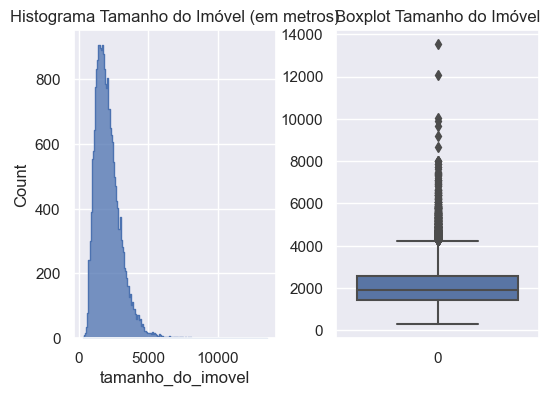

In [819]:
fig, ax = plt.subplots(1,2)
sns.set(rc={'figure.figsize':(7.5, 9.7)})
sns.histplot(df.tamanho_do_imovel, element="step", ax = ax[0]).set_title("Histograma Tamanho do Imóvel (em metros)")
sns.boxplot(df.tamanho_do_imovel, ax= ax[1]).set_title("Boxplot Tamanho do Imóvel")
plt.subplots_adjust(wspace=0.3)

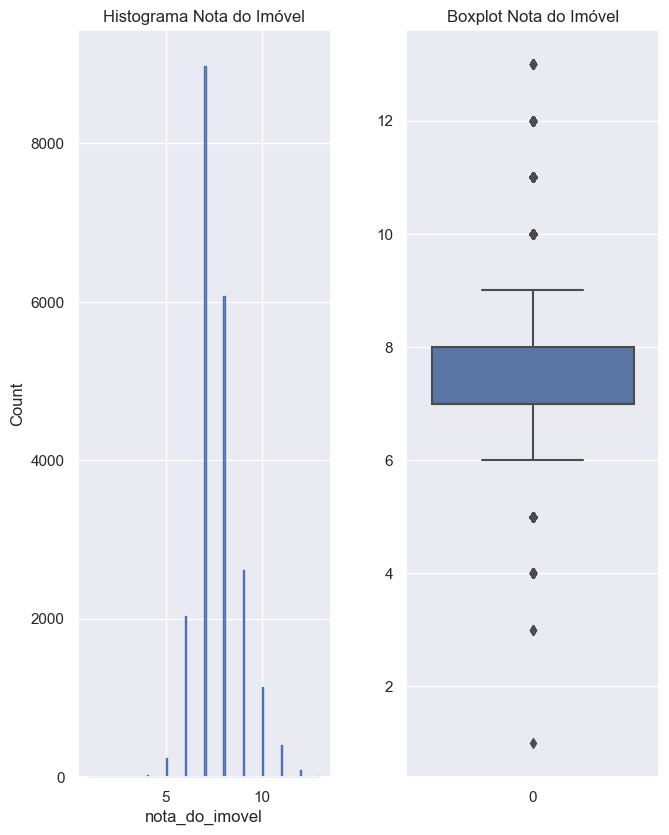

In [820]:
fig, ax = plt.subplots(1,2)
sns.set(rc={'figure.figsize':(6,4)})
sns.histplot(df.nota_do_imovel, element="step", ax = ax[0]).set_title("Histograma Nota do Imóvel")
sns.boxplot(df.nota_do_imovel, ax= ax[1]).set_title("Boxplot Nota do Imóvel")
plt.subplots_adjust(wspace=0.3)


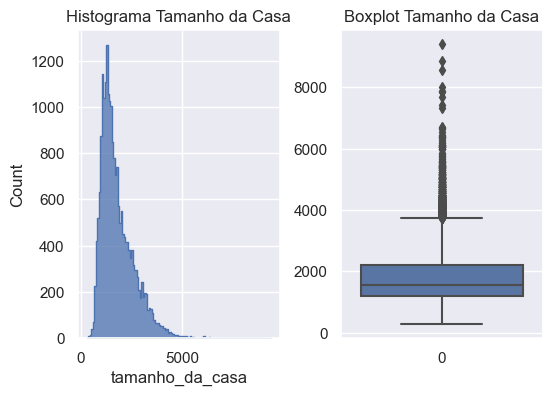

In [821]:
fig, ax = plt.subplots(1,2)
sns.set(rc={'figure.figsize':(6,4)})
sns.histplot(df.tamanho_da_casa, element="step", ax = ax[0]).set_title("Histograma Tamanho da Casa")
sns.boxplot(df.tamanho_da_casa, ax= ax[1]).set_title("Boxplot Tamanho da Casa")
plt.subplots_adjust(wspace=0.3)


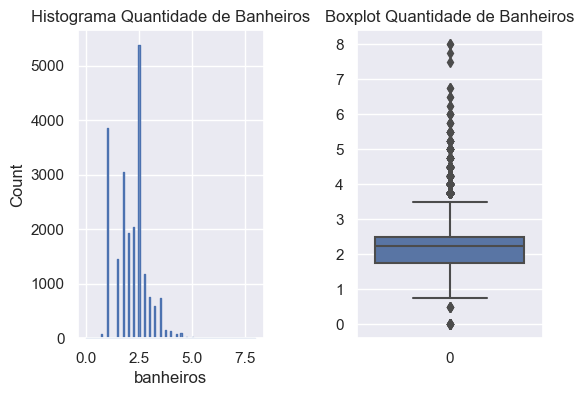

In [822]:
fig, ax = plt.subplots(1,2)
sns.set(rc={'figure.figsize':(6,4)})
sns.histplot(df.banheiros, element="step", ax = ax[0]).set_title("Histograma Quantidade de Banheiros")
sns.boxplot(df.banheiros, ax= ax[1]).set_title("Boxplot Quantidade de Banheiros")
plt.subplots_adjust(wspace=0.5)

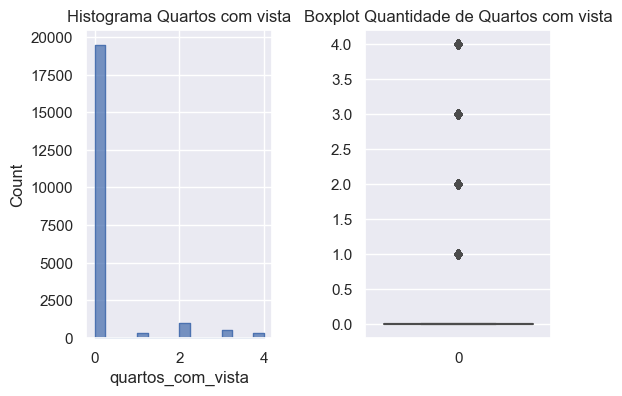

In [823]:
fig, ax = plt.subplots(1,2)
sns.set(rc={'figure.figsize':(6,4)})
sns.histplot(df.quartos_com_vista, element="step", ax = ax[0]).set_title("Histograma Quartos com vista")
sns.boxplot(df.quartos_com_vista, ax= ax[1]).set_title("Boxplot Quantidade de Quartos com vista")
plt.subplots_adjust(wspace=0.5)

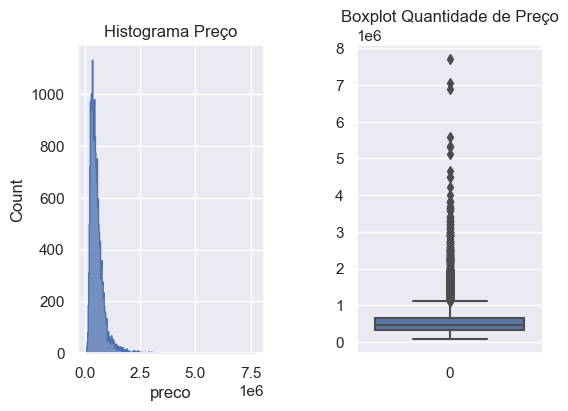

In [824]:
fig, ax = plt.subplots(1,2)
sns.set(rc={'figure.figsize':(6,4)})
sns.histplot(df.preco, element="step", ax = ax[0]).set_title("Histograma Preço")
sns.boxplot(df.preco, ax= ax[1]).set_title("Boxplot Quantidade de Preço")
plt.subplots_adjust(wspace=0.5)

#### b. Plote o scatterplot (gráfico de dispersão), contendo preço no eixo Y e a variável correlacionada no eixo X.

Text(0, 0.5, 'Preço do imóvel')

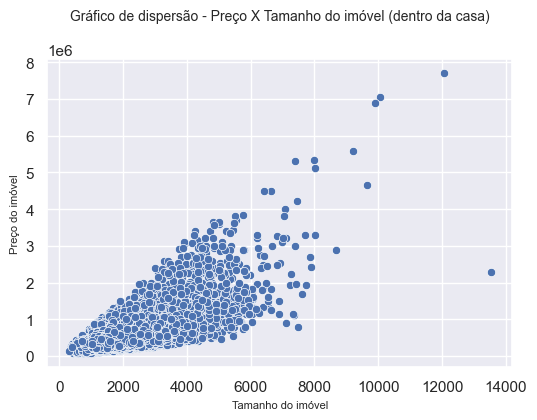

In [825]:
ax_tamanho_do_imovel = sns.scatterplot(x="tamanho_do_imovel", y="preco", data=df)
ax_tamanho_do_imovel.set_title('Gráfico de dispersão - Preço X Tamanho do imóvel (dentro da casa)', fontsize=10, y = 1.1)
ax_tamanho_do_imovel.set_xlabel("Tamanho do imóvel", fontsize=8)
ax_tamanho_do_imovel.set_ylabel("Preço do imóvel", fontsize=8)

<Axes: title={'center': 'Gráfico de dispersão - Preço X Nota do imóvel'}, xlabel='Nota do imóvel', ylabel='Preço do imóvel'>

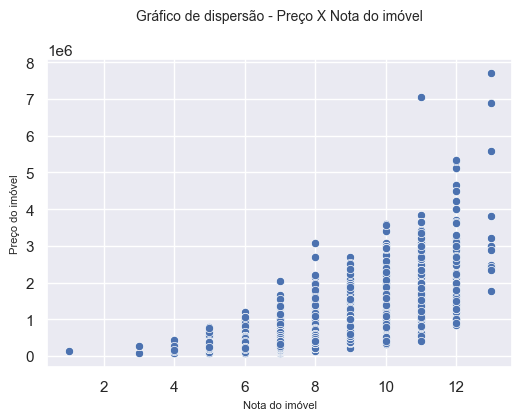

In [826]:
ax_nota_do_imovel = sns.scatterplot(x="nota_do_imovel", y="preco", data=df)
ax_nota_do_imovel.set_title('Gráfico de dispersão - Preço X Nota do imóvel', fontsize=10, y=1.1)
ax_nota_do_imovel.set_xlabel("Nota do imóvel", fontsize=8)
ax_nota_do_imovel.set_ylabel("Preço do imóvel", fontsize=8)
ax_nota_do_imovel

<Axes: title={'center': 'Gráfico de dispersão - Preço x tamanho da casa (acima do solo)'}, xlabel='Tamanho da casa', ylabel='Preço do imóvel'>

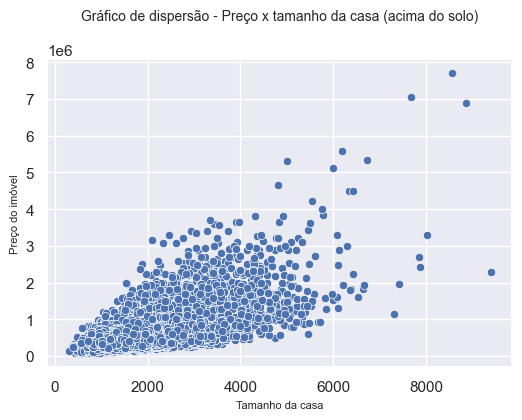

In [827]:
ax_tamanho_da_casa = sns.scatterplot(x="tamanho_da_casa", y="preco", data=df)
ax_tamanho_da_casa.set_title('Gráfico de dispersão - Preço x tamanho da casa (acima do solo)', fontsize=10, y=1.1)
ax_tamanho_da_casa.set_xlabel("Tamanho da casa", fontsize=8)
ax_tamanho_da_casa.set_ylabel("Preço do imóvel", fontsize=8)
ax_tamanho_da_casa

<Axes: title={'center': 'Gráfico de dispersão - Preço x Qtdade de banheiros'}, xlabel='Quantidade de banheiros', ylabel='Preço do imóvel'>

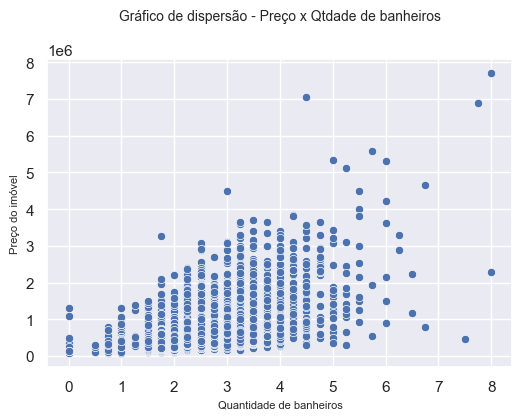

In [828]:
ax_banheiros = sns.scatterplot(x="banheiros", y="preco", data=df)
ax_banheiros.set_title('Gráfico de dispersão - Preço x Qtdade de banheiros', fontsize=10, y =1.1)
ax_banheiros.set_xlabel("Quantidade de banheiros", fontsize=8)
ax_banheiros.set_ylabel("Preço do imóvel", fontsize=8)
ax_banheiros

<Axes: title={'center': 'Gráfico de dispersão - Preço x Qtdade de quartos com vista'}, xlabel='Quantidade de quartos com vista', ylabel='Preço do imóvel'>

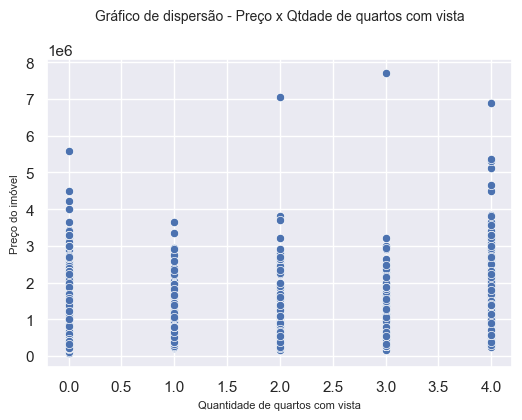

In [829]:
ax_quartos_com_vista = sns.scatterplot(x="quartos_com_vista", y="preco", data=df)
ax_quartos_com_vista.set_title('Gráfico de dispersão - Preço x Qtdade de quartos com vista', fontsize=10, y = 1.1)
ax_quartos_com_vista.set_xlabel("Quantidade de quartos com vista", fontsize=8)
ax_quartos_com_vista.set_ylabel("Preço do imóvel", fontsize=8)
ax_quartos_com_vista

#### c. Para cada uma das 5 variáveis faça uma regressão linear simples sendo preciso a variável resposta (y) e interprete os resultados.

Limpeza de Outliers e Normalização:
- Utilizamos a normalizacao geralmente quando temos variáveis com escalas muito diferentes e/ou quando temos variáveis com distribuicao diferente de normal, e isso é um pressuposto do modelo em questao. 
- Outliers: devemos tirar quando
  1. Altera o resultado da regressão (rodar com e sem e comparar o resultado)
  2. Cria uma relação que nao existe nos dados
  3. Quando gera um viés na sua regressão

In [830]:
import statsmodels.api as sm

In [831]:
# variável dependente
Y = df['preco']

In [832]:
# função para calcular regressão 
def calculate_regression(df,Y,X_name, const = True, normalize = True, logscale = False):
  if (normalize == True):
    scaler = StandardScaler() 
    df_scale = pd.DataFrame(scaler.fit_transform(df[["preco",X_name]]),columns = ["preco",X_name])
    Y = df_scale["preco"]
    X = df_scale[X_name]
  else:
    X = df[X_name]  
  if (logscale == True):
    Y = np.log(df["preco"])
    X = np.log(df[X_name])
  if (const == True):
    X = sm.add_constant(X)
  model = sm.OLS(Y,X)
  results = model.fit()
  print(results.summary())
  return results

In [833]:
def plot_regression(X, Y, reg):
  plt.scatter(X, Y)
    
  # linha de regressão
  X_plot = np.linspace(X.min(), X.max(), 100)
  Y_plot = X_plot * reg.params[1] + reg.params[0]
  plt.plot(X_plot, Y_plot, color='red')

  plt.show()

In [834]:
def plot_regression_log(X, Y, reg):
  plt.scatter(X, Y)
    
  # linha de regressão
  X_plot = np.linspace(X.min(), X.max(), 100)
  X_plot_log = np.log(X_plot)
  Y_plot_log = X_plot_log * reg.params[1] + reg.params[0]
  Y_plot = np.exp(Y_plot_log)
  plt.plot(X_plot, Y_plot, color='red')

  plt.show()

In [835]:
# função para remoção de outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

### REGRESSÃO SIMPLES

1. Geralmente rodamos a regressao primeiramente com a constante b (y = ax + b). Porém devemos verificar via teste t, se a constante realmente impacta na variável de interesse. Caso o p-valor < 0.05, esse variável é estatisticamente significativa.

2. Normalizacao: Quando temos escalas muito diferentes podemos utilizar a normalização. Um outro recurso muitas vezes utilizado, é utilizar uma transformação logaritmica para diminuir o fator da escala.


TAMANHO DO IMÓVEL

In [836]:
from sklearn.preprocessing import StandardScaler

In [837]:
# sem normalização
reg = calculate_regression(df,Y,X_name = 'tamanho_do_imovel', const = True, normalize = False)

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:46:45   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.358e+04   4402.69

Interpretando a tabela acima:
- Constant : é estatisticamente significativa, de acordo com o teste t
- tamanho do imovel : é estatisticamente significativa. 

A cada 1 sqft em área habitável aumentamos o preço do imóvel em 280 USD.

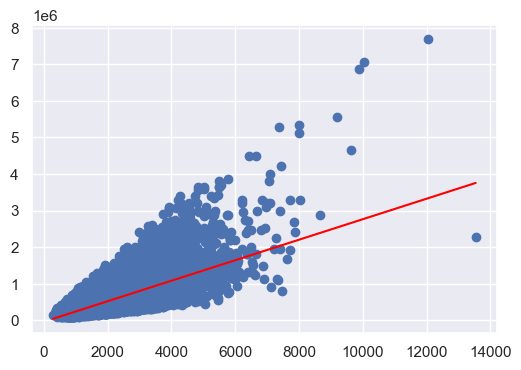

In [838]:
plot_regression(df['tamanho_do_imovel'],Y,reg)

In [839]:
# com normalização, sem escala logarítmica
reg = calculate_regression(df,Y,X_name = 'tamanho_do_imovel', const = True, normalize = True, logscale = False)

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:46:46   Log-Likelihood:                -23330.
No. Observations:               21613   AIC:                         4.666e+04
Df Residuals:                   21611   BIC:                         4.668e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -2.17e-17      0.00

Interpretando a tabela acima:
- Constant : nao é estatisticamente significativa, de acordo com o teste t
- sqft living : é estatisticamente significativa.

A cada 1 sqft em área habitável aumentamos o preço do imóvel em 0.7020 USD em uma escala de normalizada de 0 a 1.

In [840]:
# sem normalização, com escala logarítmica
reg = calculate_regression(df,Y,X_name = 'tamanho_do_imovel', const = True, normalize = False, logscale = True)


                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.808e+04
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:46:47   Log-Likelihood:                -10240.
No. Observations:               21613   AIC:                         2.048e+04
Df Residuals:                   21611   BIC:                         2.050e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.7299      0.04

Interpretando a tabela acima:
- Constant :  é estatisticamente significativa, de acordo com o teste t
- Tamanho do imóvel : é estatisticamente significativa. 

A cada 1% a mais em sqft em área habitável aumentamos o preço do imóvel em 0.83% USD

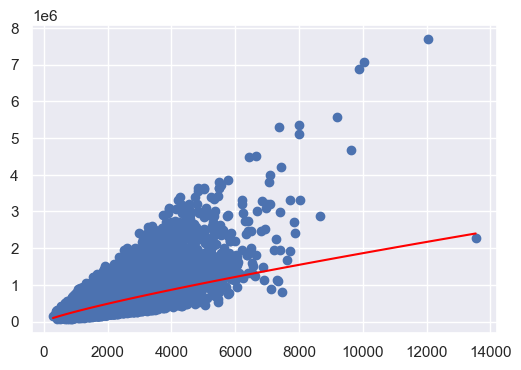

In [841]:
plot_regression_log(df['tamanho_do_imovel'], df['preco'], reg)

Em termos de interpretabilidade, o melhor é manter a variável com o valor original (sem normalização) ou utilizar o log (se convertermos X e Y em log a interpretacao se torna em variacao % ou elasticidade). Será considerado isso nas próximas variáveis.

In [842]:
# comparando após limpeza de outliers
new_df = remove_outlier(df,"tamanho_do_imovel")

In [843]:
# sem normalização, com valor original.
reg = calculate_regression(new_df,new_df["preco"],X_name = 'tamanho_do_imovel', const = True, normalize = False)

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                 1.374e+04
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:46:48   Log-Likelihood:            -2.8875e+05
No. Observations:               21041   AIC:                         5.775e+05
Df Residuals:                   21039   BIC:                         5.775e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               4.62e+04   4237.27

Houve alteração no resultado.

- Constant e Tamanho do Imóvel continuam sendo estatisticamente significativas, de acordo com o teste t

A cada 1 sqft em área habitável aumentamos o preço do imóvel em 231 USD, no exemplo anterior seria de 280 USD.


NOTA DO IMÓVEL

In [844]:
reg = calculate_regression(df,Y,X_name = 'nota_do_imovel', const = True, normalize = False, logscale = True)

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                 1.984e+04
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:46:48   Log-Likelihood:                -9772.6
No. Observations:               21613   AIC:                         1.955e+04
Df Residuals:                   21611   BIC:                         1.957e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.1425      0.035    233.

Interpretando a tabela acima:
- Constant :  é estatisticamente significativa, de acordo com o teste t
- nota do imóvel : é estatisticamente significativa. 

A cada 1% a mais em nota do imóvel aumentamos o preço do imóvel em 2.42% USD

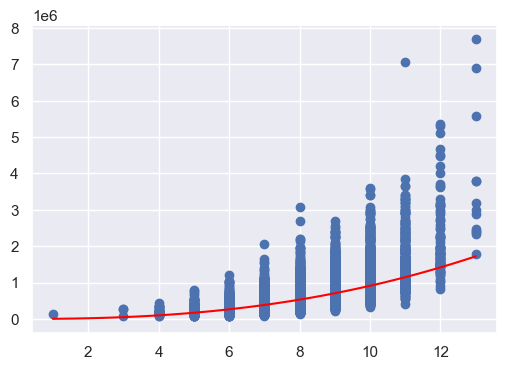

In [845]:
plot_regression_log(df['nota_do_imovel'], df['preco'], reg)

In [846]:
#removendo outliers
new_df = remove_outlier(df,"nota_do_imovel")
reg = calculate_regression(new_df,new_df["preco"],X_name = 'nota_do_imovel', const = True, normalize = False, logscale = True)

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9958.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:46:50   Log-Likelihood:                -8449.0
No. Observations:               19702   AIC:                         1.690e+04
Df Residuals:                   19700   BIC:                         1.692e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.3242      0.047    177.

Houve alteração no resultado. Constante e nota do imóvel continuam sendo estatisticamente significativas, mas a cada 1% da nota, há um aumento de 2.32%, anteriormente seria de 2.42%.


TAMANHO DA CASA

In [847]:
reg = calculate_regression(df,Y,X_name = 'tamanho_da_casa', const = True, normalize = False)

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                 1.251e+04
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:46:50   Log-Likelihood:            -3.0267e+05
No. Observations:               21613   AIC:                         6.053e+05
Df Residuals:                   21611   BIC:                         6.054e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.995e+04   4729.812     

Interpretando a tabela acima:
- Constant : é estatisticamente significativa, de acordo com o teste t
- tamanho da casa : é estatisticamente significativa. 

A cada 1 sqft aumentamos o preço do imóvel em 268,47 USD.

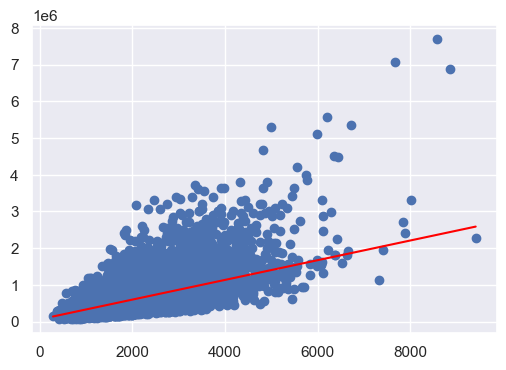

In [848]:
# plotando regressão
plot_regression(df["tamanho_da_casa"],Y, reg)

In [849]:
#removendo outliers
new_df = remove_outlier(df,"tamanho_da_casa")
reg = calculate_regression(new_df,new_df['preco'],X_name = 'tamanho_da_casa', const = True, normalize = False)

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     7341.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:46:51   Log-Likelihood:            -2.9135e+05
No. Observations:               20994   AIC:                         5.827e+05
Df Residuals:                   20992   BIC:                         5.827e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.377e+05   4723.243     

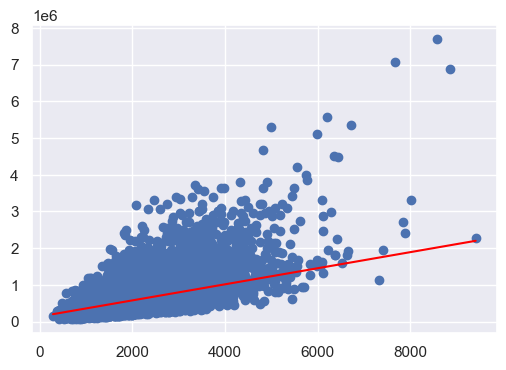

In [850]:
# plotando regressão
plot_regression(df["tamanho_da_casa"],Y, reg)

Houve alteração no resultado.
Constante e tamanho da casa continuam sendo estatisticamente significativas, porém a cada 1 sqft aumentamos o preço do imóvel em 219,08 USD, anteriormente seria de 268,47.

BANHEIROS

In [851]:
reg = calculate_regression(df,Y,X_name = 'banheiros', const = True, normalize = False)

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     8229.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:46:53   Log-Likelihood:            -3.0412e+05
No. Observations:               21613   AIC:                         6.082e+05
Df Residuals:                   21611   BIC:                         6.083e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.071e+04   6210.669      1.724      0.0

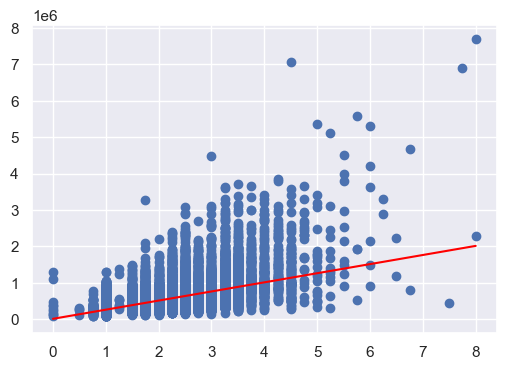

In [852]:
plot_regression(df["banheiros"],Y, reg)

In [853]:
#removendo outliers
new_df = remove_outlier(df,"banheiros")
reg = calculate_regression(new_df,new_df['preco'], X_name = 'banheiros', const = True, normalize = False)

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     5260.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:46:55   Log-Likelihood:            -2.9321e+05
No. Observations:               21042   AIC:                         5.864e+05
Df Residuals:                   21040   BIC:                         5.864e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.075e+05   5942.762     18.082      0.0

Houve alteração após remoção dos outliers.

Com outliers: 

- Constant: não é estatisticamente significativa, de acordo com o teste t
- banheiros: é estatisticamente significativa. 

Sem outliers: 
- Constante e banheiros são estatisticamente significativas e a cada banheiro há um aumento de 198.600 USD no preço.


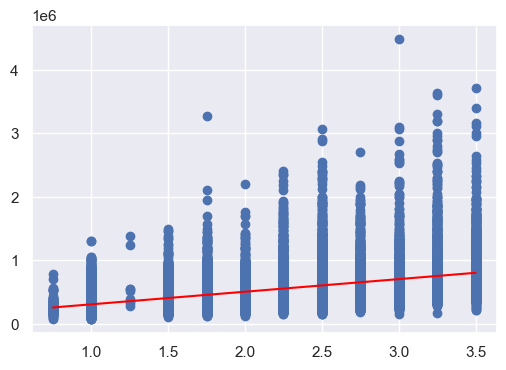

In [854]:
plot_regression(new_df["banheiros"], new_df["preco"], reg)

QUARTOS COM VISTA

In [855]:
reg = calculate_regression(df,Y,X_name = 'quartos_com_vista', const = True, normalize = False)

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     4050.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:46:56   Log-Likelihood:            -3.0575e+05
No. Observations:               21613   AIC:                         6.115e+05
Df Residuals:                   21611   BIC:                         6.115e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.955e+05   2396.47

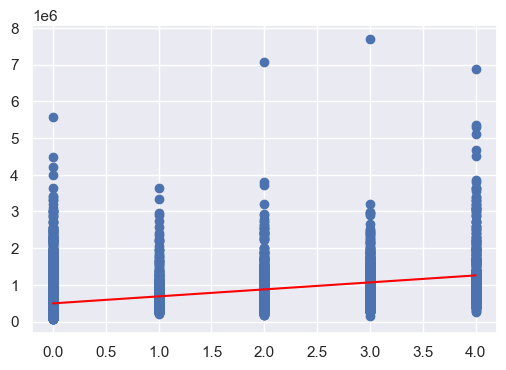

In [856]:
plot_regression(df["quartos_com_vista"],Y, reg)

De acordo com a tabela e gráfico acima:

- Constante: é estatisticamente significativa, de acordo com o teste t
- quartos com vista: é estatisticamente significativa. 

A cada quarto com vista há um aumento de 190.300 USD no preço.